## Step 1.
 1) Download this data set Links to an external site. that lists some tidal measurements Santa Cruz in January and February 2022. In your Jupyter notebook, define an oscillatory function in Python to describe the intra- and inter-day variations in the tide.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#import data (read mode, as i assume we won't be writing to txt)
data = open('The Data.txt', 'r')

In [3]:
data_arr = data.readlines()
data_list = []
for line in data_arr:
    data_list.append(line.split())
#hardcode method to remove the comments at the top of the text (do we have to use the text file **exactly**? i don't know.
data_list.remove(data_list[0])
data_list.remove(data_list[0])
data_list.remove(data_list[0])
print(data_list)

#if the assignment is what i think it is, we should have a function to turn the time into an integer. will be much better when we graph time vs height.


[['1', '8:07', '6.57'], ['1', '15:37', '-0.39'], ['2', '8:55', '5.38'], ['2', '16:25', '-1.74'], ['3', '9:45', '5.26'], ['3', '17:14', '-1.36'], ['4', '10:35', '4.13'], ['4', '18:00', '-1.15'], ['5', '11:28', '3.48'], ['5', '18:46', '-1.61'], ['6', '12:22', '2.62'], ['6', '19:31', '0.05'], ['7', '13:24', '1.83'], ['7', '20:16', '1.01'], ['8', '3:22', '3.57'], ['8', '21:01', '0.73'], ['9', '4:07', '4.54'], ['9', '21:46', '2.17'], ['10', '4:50', '3.76'], ['10', '11:58', '2.88'], ['11', '5:31', '3.90'], ['11', '12:56', '1.92'], ['12', '6:08', '4.73'], ['12', '13:45', '1.74'], ['13', '6:47', '5.66'], ['13', '14:25', '0.79'], ['14', '7:22', '5.33'], ['14', '15:00', '-0.04'], ['15', '7:59', '5.23'], ['15', '15:34', '-1.12'], ['16', '8:34', '6.67'], ['16', '16:08', '-0.61'], ['17', '9:10', '4.74'], ['17', '16:41', '-0.93'], ['18', '9:45', '4.69'], ['18', '17:12', '-1.29'], ['19', '10:21', '4.20'], ['19', '17:45', '0.22'], ['20', '10:57', '3.68'], ['20', '18:15', '0.26'], ['21', '11:38', '2.47

In [4]:
#converting everything to int.
time_hours = []
height = []

for row in data_list:
    #days hours height
    d = row[0]
    h = row[1]
    height_row = row[2]

    day = int(d)

    #split hours and minutes
    time = h.split(":")
    hours = time[0]
    minutes = time[1]

    #intify
    hour = int(hours)
    minute = int(minutes)
    heights = float(height_row)
    
    time_in_hours = (day - 1) * 24 + hour + minute//60.0
    #this drove me crazy, but i forgot to add a way to combine and pair time and height

    

    time_hours.append(time_in_hours)
    height.append(heights)

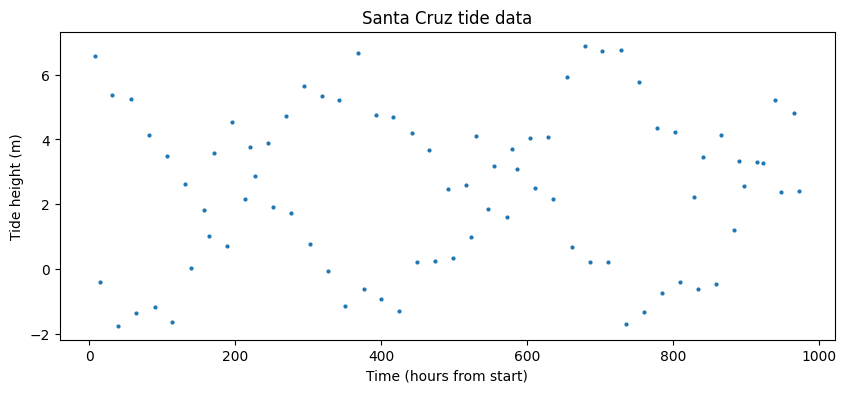

In [5]:
plt.figure(figsize=(10,4))
plt.plot(time_hours, height, '.', markersize=4)
plt.xlabel('Time (hours from start)')
plt.ylabel('Tide height (m)')
plt.title('Santa Cruz tide data')
plt.show()

In [6]:
#Estimate parameters from the data for plotting (Mixture of Session 9 Material and 8 if you guys want reference.)
#THIS ISN'T FITTED BY THE WAY
A0 = np.mean(height)  #mean tide level
height_range = np.max(height) - np.min(height)
A1 = height_range / 2  #base amplitude of daily tides
A2 = height_range / 4  #how much the amplitude varies
T1 = 14.76 * 24  #spring-neap period of about 350 hours
T2 = 12.42  #daily tide cycle of about 12 hours
phi1 = 0
phi2 = 0

#Define oscillatory function for tide height
def osc_func(t, A0, A1, A2, T1, T2, phi1, phi2):
    #The amplitude of daily tides changes over the cycle
    #During big tides: amplitude is bigger (A1 + A2)
    #During small tides: amplitude is smaller (A1 - A2)
    daily_amplitude = A1 + A2 * np.sin(2 * np.pi * t / T1 + phi1)
    
    #Daily tide oscillation with the varying amplitude
    daily_tide = daily_amplitude * np.sin(2 * np.pi * t / T2 + phi2)
    
    #Total tide height = baseline + modulated daily oscillation
    return A0 + daily_tide

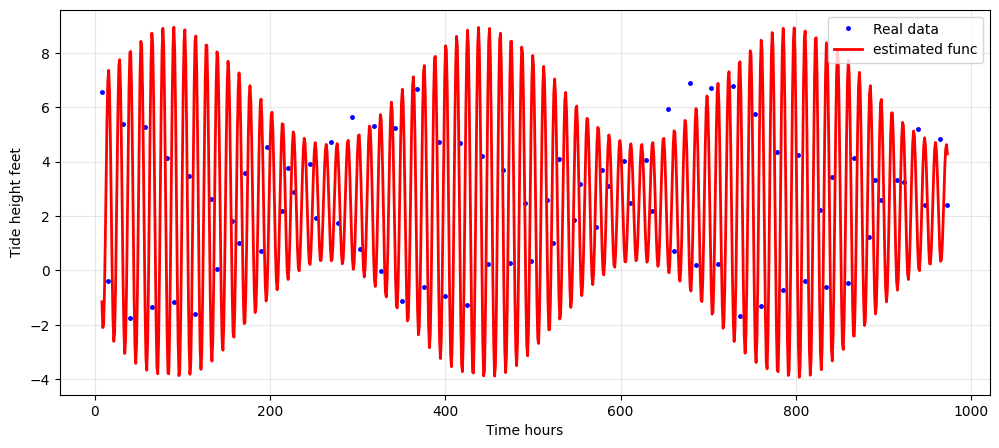

In [7]:
#Plot the data with our estimated oscillatory function
#Create smooth time array for plotting the curve using linspace
t_smooth = np.linspace(min(time_hours), max(time_hours), 1000)

#Calculate predicted heights using our function and estimated parameters
predicted_height = osc_func(t_smooth, A0, A1, A2, T1, T2, phi1, phi2)

#Create the plot
plt.figure(figsize=(12, 5))
plt.plot(time_hours, height, '.', markersize=5, label='Real data', color='blue')
plt.plot(t_smooth, predicted_height, '-', linewidth=2, label='estimated func', color='red')
plt.xlabel('Time hours')
plt.ylabel('Tide height feet')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
#This is visualization for My Sake. Next person can Comment this out -evan.

#Note for next person: use scipy.optimize_curve_fit
#The curve_fit function should have better values
#to make the red curve fit the blue dots more closely.

2) Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF.

In [8]:
from scipy.optimize import curve_fit

In [9]:
print(len(time_hours), len(height))
#trying to troubleshoot something...

82 82


t length: 82
h length: 82
sigma length: 82
Best-fit parameters:
A (amplitude) = 0.7070052379342503
w (angular frequency) = 0.5153784215974455
phi (phase shift) = -4.161220003942427
C   = 2.4577771643395465


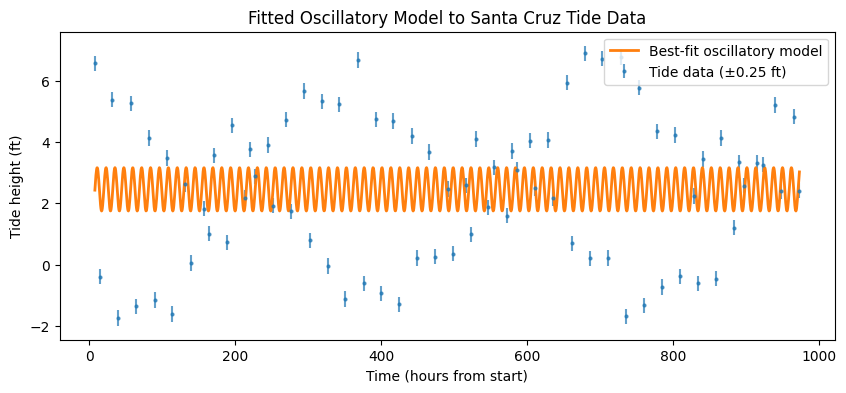

In [10]:
t = np.array(time_hours, dtype=float)
h = np.array(height, dtype=float)

print("t length:", len(t))
print("h length:", len(h))

# RMS error on height is 0.25 ft
sigma = np.ones_like(h, dtype=float) * 0.25
print("sigma length:", len(sigma))


def tide_model(t, A, w, phi, C):
    """
    tide_model function takes the time t and calculates the predicted height 
    for simplatiry and to clearfiy
    A  = amplitude
    w  = angular frequency
    phi = phase shift
    C  = vertical offset (mean tide level)
    """
    return A * np.sin(w * t + phi) + C

#initial guesses for parameters 
A0 = (np.max(h) - np.min(h)) / 2      
C0 = np.mean(h)                       
w0 = 2 * np.pi / 12.4                 
phi0 = 0                             
initial_guess = [A0, w0, phi0, C0]

w_min = 2 * np.pi / 15.0   # lower frequency 
w_max = 2 * np.pi / 10.0   # higher frequency 

lower_bounds = [0.0,  w_min, -2*np.pi, -5.0]
upper_bounds = [10.0, w_max,  2*np.pi, 10.0]

# fiting the model to the data with bounds
params, cov = curve_fit(
    tide_model,
    t, h,
    p0=initial_guess,
    sigma=sigma,
    absolute_sigma=True,
    bounds=(lower_bounds, upper_bounds)
)

A_fit, w_fit, phi_fit, C_fit = params
print("Best-fit parameters:")
print("A (amplitude) =", A_fit)
print("w (angular frequency) =", w_fit)
print("phi (phase shift) =", phi_fit)
print("C   =", C_fit)


t_smooth = np.linspace(t.min(), t.max(), 2000)
h_fit = tide_model(t_smooth, *params)

#trying to figure out the ploting now
plt.figure(figsize=(10, 4))

plt.errorbar(
    t, h,
    yerr=sigma,
    fmt='.',
    markersize=4,
    alpha=0.7,
    label="Tide data (±0.25 ft)"
)

plt.plot(
    t_smooth,
    h_fit,
    linewidth=2,
    label="Best-fit oscillatory model"
)

plt.xlabel("Time (hours from start)")
plt.ylabel("Tide height (ft)")
plt.title("Fitted Oscillatory Model to Santa Cruz Tide Data")
plt.legend()

plt.savefig("tide_fit.pdf")
plt.show()

#can someone run this and check if the graph looks alright?
